# Reading Annotaions

In [1]:
folder = '38'
image_prefix = "MOS0"

In [2]:
import re
from datetime import datetime

# Define the file path
file_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/annotaions/annotations.txt'

# Function to safely parse coordinate data
def parse_coordinates(coord_string):
    try:
        coordinates = eval(coord_string)
        if isinstance(coordinates, list) and all(isinstance(coord, tuple) for coord in coordinates):
            return coordinates
    except:
        return []

# Function to parse a line
def parse_line(line):
    # Use regex to split line while ignoring commas within square brackets
    parts = re.split(r',(?![^\[\]]*\])', line.strip())

    if len(parts) < 6:
        return None, 'Insufficient data'

    try:
        active = int(parts[0])
        index = int(parts[1])
        data_type = int(parts[2])
        coordinates = parse_coordinates(parts[3])
        colour = parts[4]
        fixed_value = int(parts[5])
    except ValueError as e:
        return None, str(e)

    return {
        'Active': active,
        'Index': index,
        'Type': data_type,
        'Coordinates': coordinates,
        'Color': colour,
        'Fixed Value': fixed_value
    }, None

# Main function to read and categorize data
def read_and_categorize(file_path):
    categorized_data = []
    error_count = 0

    try:
        with open(file_path, 'r') as file:
            for line in file:
                parsed_data, error = parse_line(line)
                if parsed_data:
                    categorized_data.append(parsed_data)
#                     print("Data parsed successfully:", parsed_data)
                elif error:
                    print(f"Skipping line due to parsing error: {line}. Error: {error}")
                    error_count += 1
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")

    return categorized_data, error_count

# Read and print the categorized data
categorized_data, error_count = read_and_categorize(file_path)

if not categorized_data and error_count == 0:
    print("No data was parsed successfully.")
else:
    print(f"Total number of parsing errors: {error_count}")


Total number of parsing errors: 0


In [3]:
cd = 0
panck = 0
others = 0
cd_less = 0
for i in range(len(categorized_data)):
    if categorized_data[i]['Color'] == "#00ffff" or categorized_data[i]['Color'] == "#0000ff":
        cd += 1
    elif categorized_data[i]['Color'] == '#c0c0c0':
        cd_less += 1
    elif categorized_data[i]['Color'] == '#ff00ff':
        panck += 1
    else:
        others += 1

In [4]:
print('cd45+ 95%: ' + str(cd))
print('cd45+ 70%: ' + str(cd_less))
print('panck: ' + str(panck))
print('others: ' + str(others))

cd45+ 95%: 618
cd45+ 70%: 0
panck: 647
others: 654


In [5]:
points_normalized = []
points_colors = []
for i in range(len(categorized_data)):
    points_normalized.append(categorized_data[i]['Coordinates'][0])
    points_colors.append(categorized_data[i]['Color'])  # Extracting color

    
max(points_normalized, key=lambda x:x[0])


(0.8209527167345828, 0.3793288777697201)

all points: 1919
 points shown: 1919


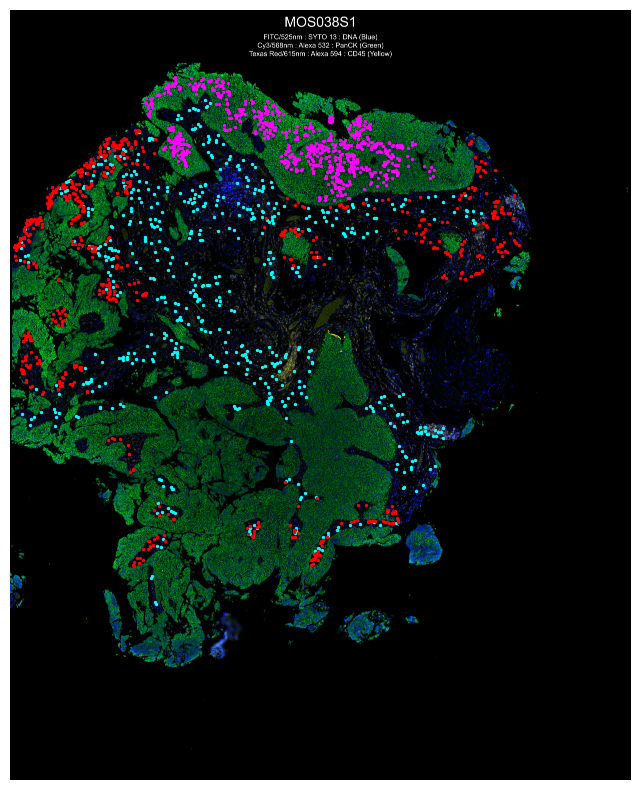

In [6]:
import cv2
import matplotlib.pyplot as plt

# Path to your image
image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/original_image/{image_prefix}{folder}S1.png"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Get the width and height of the image
height, width, _ = image.shape

# Lists to hold normalized points (x, y) and their respective colors
points_normalized = []
points_colors = []

# Extract coordinates and colors from categorized_data
for i in range(len(categorized_data)):
    points_normalized.append(categorized_data[i]['Coordinates'][0])
    points_colors.append(categorized_data[i]['Color'])  # Extracting color

# Convert normalized coordinates to pixel values
points_pixel = [(int(x * width), int(y * width)) for x, y in points_normalized]

plt.figure(figsize=(10, 10))

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

print(f'all points: {len(points_pixel)}')
points_shown = 0

# Plot the points on the image with their respective colors
for (x, y), color in zip(points_pixel, points_colors):
    plt.scatter(x, y, c=color, marker='o', s=2)  # Using extracted color for each point
    points_shown += 1

print(f' points shown: {points_shown}')

plt.axis("off")
# plt.savefig("/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/28/MS028S1.png")    
# Show the image with points
plt.show()


# Get Tissue

Patch at (0, 0): Size = (1000, 1000)
Patch at (0, 1000): Size = (1000, 1000)
Patch at (0, 2000): Size = (1000, 1000)
Patch at (0, 3000): Size = (1000, 1000)
Patch at (0, 4000): Size = (1000, 1000)
Patch at (0, 5000): Size = (1000, 1000)
Patch at (0, 6000): Size = (1000, 1000)
Patch at (0, 7000): Size = (1000, 1000)
Patch at (0, 8000): Size = (1000, 1000)
Patch at (0, 9000): Size = (1000, 1000)
Patch at (0, 10000): Size = (1000, 1000)
Patch at (0, 11000): Size = (1000, 1000)
Patch at (0, 12000): Size = (1000, 1000)
Patch at (0, 13000): Size = (1000, 1000)
Patch at (1000, 0): Size = (1000, 1000)
Patch at (1000, 1000): Size = (1000, 1000)
Patch at (1000, 2000): Size = (1000, 1000)
Patch at (1000, 3000): Size = (1000, 1000)
Patch at (1000, 4000): Size = (1000, 1000)
Patch at (1000, 5000): Size = (1000, 1000)
Patch at (1000, 6000): Size = (1000, 1000)
Patch at (1000, 7000): Size = (1000, 1000)
Patch at (1000, 8000): Size = (1000, 1000)
Patch at (1000, 9000): Size = (1000, 1000)
Patch at (10

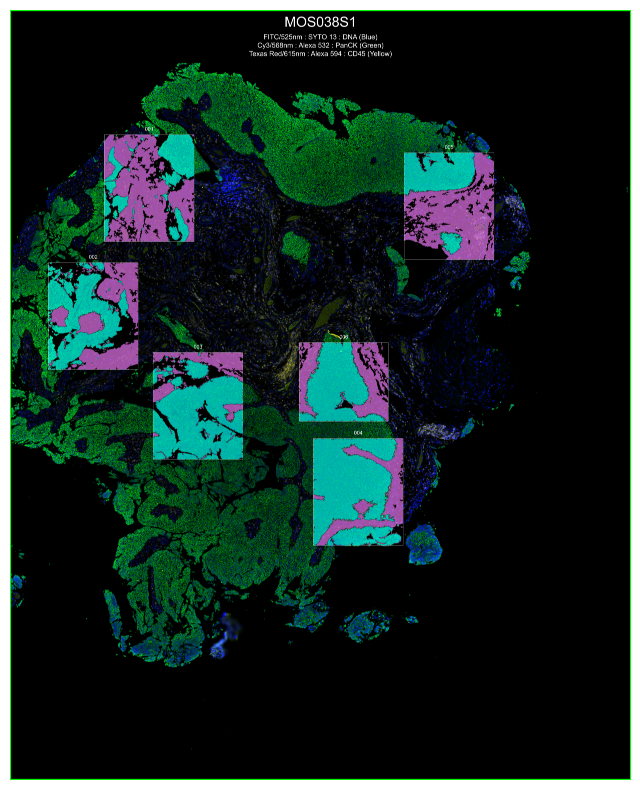

[(0, 0, 1000, 1000), (0, 1000, 1000, 2000), (0, 2000, 1000, 3000), (0, 3000, 1000, 4000), (0, 4000, 1000, 5000), (0, 5000, 1000, 6000), (0, 6000, 1000, 7000), (0, 7000, 1000, 8000), (0, 8000, 1000, 9000), (0, 9000, 1000, 10000), (0, 10000, 1000, 11000), (0, 11000, 1000, 12000), (0, 12000, 1000, 13000), (0, 13000, 1000, 14000), (1000, 0, 2000, 1000), (1000, 1000, 2000, 2000), (1000, 2000, 2000, 3000), (1000, 3000, 2000, 4000), (1000, 4000, 2000, 5000), (1000, 5000, 2000, 6000), (1000, 6000, 2000, 7000), (1000, 7000, 2000, 8000), (1000, 8000, 2000, 9000), (1000, 9000, 2000, 10000), (1000, 10000, 2000, 11000), (1000, 11000, 2000, 12000), (1000, 12000, 2000, 13000), (1000, 13000, 2000, 14000), (2000, 0, 3000, 1000), (2000, 1000, 3000, 2000), (2000, 2000, 3000, 3000), (2000, 3000, 3000, 4000), (2000, 4000, 3000, 5000), (2000, 5000, 3000, 6000), (2000, 6000, 3000, 7000), (2000, 7000, 3000, 8000), (2000, 8000, 3000, 9000), (2000, 9000, 3000, 10000), (2000, 10000, 3000, 11000), (2000, 11000, 3

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def detect_rois_and_create_patches(first_image_path, second_image_path, output_folder, patch_size=(1000, 1000),
                                    min_width=6000, min_height=6000, lower_white=np.array([0,0,0]),
                                    upper_white=np.array([255,255,255])):
    # Read the first image
    image = cv2.imread(first_image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask for white color
    mask = cv2.inRange(image, lower_white, upper_white)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Load the second image for cropping
    crop_image = cv2.imread(second_image_path)

    # Initialize lists to store width and height of each ROI
    widths = []
    heights = []

    # First iteration to find minimum width and height
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w >= min_width and h >= min_height:
            widths.append(w)
            heights.append(h)

    # Determine common width and height for all ROIs
    common_width = min(widths)
    common_height = min(heights)

    roi_boxes = []
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)

        # Check for minimum size
        if w >= min_width and h >= min_height:
            epsilon = 0.05 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)

            # Adjust x, y, width, and height to get the common size ROI
            new_x = max(x + (w - common_width) // 2, 0)
            new_y = max(y + (h - common_height) // 2, 0)

            # Create patches within the ROI
            num_patches_x = (common_width // patch_size[0])
            num_patches_y = (common_height // patch_size[1])

            for patch_x in range(num_patches_x):
                for patch_y in range(num_patches_y):
                    patch_start_x = new_x + patch_x * patch_size[0]
                    patch_start_y = new_y + patch_y * patch_size[1]
                    patch_end_x = patch_start_x + patch_size[0]
                    patch_end_y = patch_start_y + patch_size[1]
                    
                    # Ensure the patch stays within the ROI boundaries
                    if patch_end_x <= (new_x + common_width) and patch_end_y <= (new_y + common_height):
                        roi_boxes.append((patch_start_x, patch_start_y, patch_end_x, patch_end_y))

                        # Crop the patch from the second image using the adjusted coordinates
                        patch = crop_image[patch_start_y:patch_end_y, patch_start_x:patch_end_x]
                        cv2.imwrite(os.path.join(output_folder, f"{folder}_roi_{i}_patch_{patch_x}_{patch_y}.jpg"), patch)
                        print(f"Patch at ({patch_start_x}, {patch_start_y}): Size = {patch_size}")

            # Draw a bounding box around the detected ROI on the first image
            cv2.rectangle(image, (new_x, new_y), (new_x + common_width, new_y + common_height), (0, 255, 0), 40)

    # Convert BGR to RGB for Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the result using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()

    return roi_boxes

# Example usage
first_image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/original_image_MU/{image_prefix}{folder}S1_MU.png"
second_image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/original_image/{image_prefix}{folder}S1.png"
output_folder = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/patches"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

rois = detect_rois_and_create_patches(first_image_path, second_image_path, output_folder)
print(rois)


# Creating Patches of 640 * 640

Patch at (0, 0): Size = (640, 640)
Patch at (0, 640): Size = (640, 640)
Patch at (0, 1280): Size = (640, 640)
Patch at (0, 1920): Size = (640, 640)
Patch at (0, 2560): Size = (640, 640)
Patch at (0, 3200): Size = (640, 640)
Patch at (0, 3840): Size = (640, 640)
Patch at (0, 4480): Size = (640, 640)
Patch at (0, 5120): Size = (640, 640)
Patch at (0, 5760): Size = (640, 640)
Patch at (0, 6400): Size = (640, 640)
Patch at (0, 7040): Size = (640, 640)
Patch at (0, 7680): Size = (640, 640)
Patch at (0, 8320): Size = (640, 640)
Patch at (0, 8960): Size = (640, 640)
Patch at (0, 9600): Size = (640, 640)
Patch at (0, 10240): Size = (640, 640)
Patch at (0, 10880): Size = (640, 640)
Patch at (0, 11520): Size = (640, 640)
Patch at (0, 12160): Size = (640, 640)
Patch at (0, 12800): Size = (640, 640)
Patch at (0, 13440): Size = (640, 640)
Patch at (0, 13485): Size = (640, 640)
Patch at (640, 0): Size = (640, 640)
Patch at (640, 640): Size = (640, 640)
Patch at (640, 1280): Size = (640, 640)
Patch a

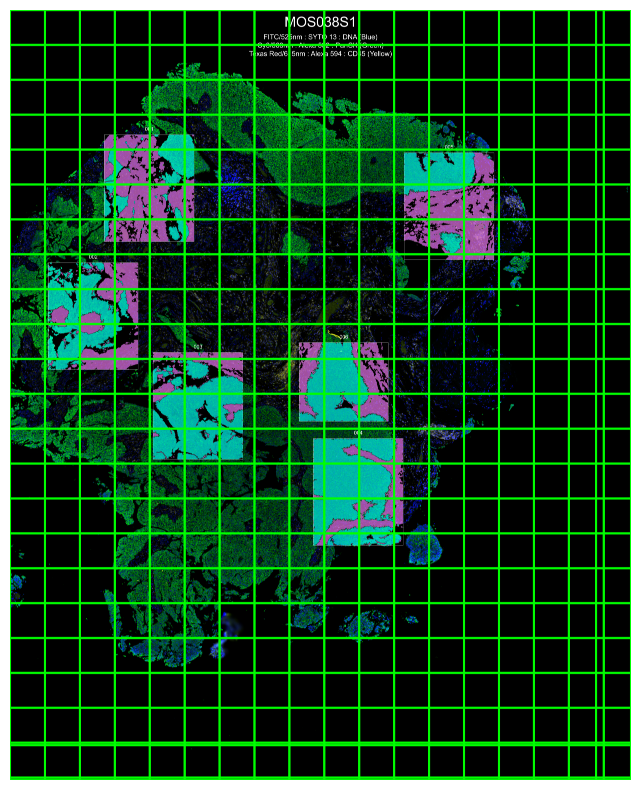

[(0, 0, 640, 640), (0, 640, 640, 1280), (0, 1280, 640, 1920), (0, 1920, 640, 2560), (0, 2560, 640, 3200), (0, 3200, 640, 3840), (0, 3840, 640, 4480), (0, 4480, 640, 5120), (0, 5120, 640, 5760), (0, 5760, 640, 6400), (0, 6400, 640, 7040), (0, 7040, 640, 7680), (0, 7680, 640, 8320), (0, 8320, 640, 8960), (0, 8960, 640, 9600), (0, 9600, 640, 10240), (0, 10240, 640, 10880), (0, 10880, 640, 11520), (0, 11520, 640, 12160), (0, 12160, 640, 12800), (0, 12800, 640, 13440), (0, 13440, 640, 14080), (0, 13485, 640, 14125), (640, 0, 1280, 640), (640, 640, 1280, 1280), (640, 1280, 1280, 1920), (640, 1920, 1280, 2560), (640, 2560, 1280, 3200), (640, 3200, 1280, 3840), (640, 3840, 1280, 4480), (640, 4480, 1280, 5120), (640, 5120, 1280, 5760), (640, 5760, 1280, 6400), (640, 6400, 1280, 7040), (640, 7040, 1280, 7680), (640, 7680, 1280, 8320), (640, 8320, 1280, 8960), (640, 8960, 1280, 9600), (640, 9600, 1280, 10240), (640, 10240, 1280, 10880), (640, 10880, 1280, 11520), (640, 11520, 1280, 12160), (640, 

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def detect_rois_and_create_patches(first_image_path, second_image_path, output_folder, patch_size=(640, 640),
                                   min_width=5000, min_height=5000, lower_white=np.array([0,0,0]),
                                   upper_white=np.array([255,255,255])):
    # Read the first image
    image = cv2.imread(first_image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask for white color
    mask = cv2.inRange(image, lower_white, upper_white)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Load the second image for cropping
    crop_image = cv2.imread(second_image_path)

    # Initialize lists to store width and height of each ROI
    widths = []
    heights = []
    patch_counter = 0  # Initialize patch counter
    # First iteration to find minimum width and height
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w >= min_width and h >= min_height:
            widths.append(w)
            heights.append(h)

    # Determine common width and height for all ROIs
    common_width = min(widths)
    common_height = min(heights)

    roi_boxes = []
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)

        # Check for minimum size
        if w >= min_width and h >= min_height:
            # Adjust x, y, width, and height to get the common size ROI
            new_x = max(x + (w - common_width) // 2, 0)
            new_y = max(y + (h - common_height) // 2, 0)

            # Create patches within the ROI
            num_patches_x = (common_width + patch_size[0] - 1) // patch_size[0]  # Calculate number of patches in x direction
            num_patches_y = (common_height + patch_size[1] - 1) // patch_size[1]  # Calculate number of patches in y direction

            
            
            for patch_x in range(num_patches_x):
                for patch_y in range(num_patches_y):
                    # Adjust the start x coordinate for the last patch in a row
                    if patch_x == num_patches_x - 1 and common_width - patch_x * patch_size[0] < patch_size[0]:
                        patch_start_x = new_x + common_width - patch_size[0]
                    else:
                        patch_start_x = new_x + patch_x * patch_size[0]

                    # Adjust the start y coordinate for the last patch in a column
                    if patch_y == num_patches_y - 1 and common_height - patch_y * patch_size[1] < patch_size[1]:
                        patch_start_y = new_y + common_height - patch_size[1]
                    else:
                        patch_start_y = new_y + patch_y * patch_size[1]

                    patch_end_x = patch_start_x + patch_size[0]
                    patch_end_y = patch_start_y + patch_size[1]

                    roi_boxes.append((patch_start_x, patch_start_y, patch_end_x, patch_end_y))

                    # Draw a bounding box around the patch on the first image
                    cv2.rectangle(image, (patch_start_x, patch_start_y), (patch_end_x, patch_end_y), (0, 255, 0), 40)

                    # Crop the patch from the second image using the adjusted coordinates
                    patch = crop_image[patch_start_y:patch_end_y, patch_start_x:patch_end_x]
                    cv2.imwrite(os.path.join(patches_folder, f"{folder}_roi_{patch_counter}.jpg"), patch)
                    print(f"Patch at ({patch_start_x}, {patch_start_y}): Size = {patch_size}")
                    patch_counter += 1  # Increment the patch counter
            # Convert BGR to RGB for Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the result using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()

    return roi_boxes

# Example usage

first_image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/original_image_MU/{image_prefix}{folder}S1_MU.png"
second_image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/original_image/{image_prefix}{folder}S1.png"
output_folder = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/patches"

patches_folder = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

rois = detect_rois_and_create_patches(first_image_path, second_image_path, output_folder)
print(rois)


In [9]:
rois

[(0, 0, 640, 640),
 (0, 640, 640, 1280),
 (0, 1280, 640, 1920),
 (0, 1920, 640, 2560),
 (0, 2560, 640, 3200),
 (0, 3200, 640, 3840),
 (0, 3840, 640, 4480),
 (0, 4480, 640, 5120),
 (0, 5120, 640, 5760),
 (0, 5760, 640, 6400),
 (0, 6400, 640, 7040),
 (0, 7040, 640, 7680),
 (0, 7680, 640, 8320),
 (0, 8320, 640, 8960),
 (0, 8960, 640, 9600),
 (0, 9600, 640, 10240),
 (0, 10240, 640, 10880),
 (0, 10880, 640, 11520),
 (0, 11520, 640, 12160),
 (0, 12160, 640, 12800),
 (0, 12800, 640, 13440),
 (0, 13440, 640, 14080),
 (0, 13485, 640, 14125),
 (640, 0, 1280, 640),
 (640, 640, 1280, 1280),
 (640, 1280, 1280, 1920),
 (640, 1920, 1280, 2560),
 (640, 2560, 1280, 3200),
 (640, 3200, 1280, 3840),
 (640, 3840, 1280, 4480),
 (640, 4480, 1280, 5120),
 (640, 5120, 1280, 5760),
 (640, 5760, 1280, 6400),
 (640, 6400, 1280, 7040),
 (640, 7040, 1280, 7680),
 (640, 7680, 1280, 8320),
 (640, 8320, 1280, 8960),
 (640, 8960, 1280, 9600),
 (640, 9600, 1280, 10240),
 (640, 10240, 1280, 10880),
 (640, 10880, 1280, 1

# Annotaions inside Patches

Image dimensions: 11380 x 14125
Points_pixel: 1919
Sample points (in pixel coordinates): [(3379, 4839), (3380, 4863), (3469, 4904)]
ROI: (0, 0, 640, 640)
ROI: (0, 640, 640, 1280)
ROI: (0, 1280, 640, 1920)
ROI: (0, 1920, 640, 2560)
ROI: (0, 2560, 640, 3200)
ROI: (0, 3200, 640, 3840)
ROI: (0, 3840, 640, 4480)
ROI: (0, 4480, 640, 5120)
ROI: (0, 5120, 640, 5760)
ROI: (0, 5760, 640, 6400)
ROI: (0, 6400, 640, 7040)
ROI: (0, 7040, 640, 7680)
ROI: (0, 7680, 640, 8320)
ROI: (0, 8320, 640, 8960)
ROI: (0, 8960, 640, 9600)
ROI: (0, 9600, 640, 10240)
ROI: (0, 10240, 640, 10880)
ROI: (0, 10880, 640, 11520)
ROI: (0, 11520, 640, 12160)
ROI: (0, 12160, 640, 12800)
ROI: (0, 12800, 640, 13440)
ROI: (0, 13440, 640, 14080)
ROI: (0, 13485, 640, 14125)
ROI: (640, 0, 1280, 640)
ROI: (640, 640, 1280, 1280)
ROI: (640, 1280, 1280, 1920)
ROI: (640, 1920, 1280, 2560)
ROI: (640, 2560, 1280, 3200)
ROI: (640, 3200, 1280, 3840)
ROI: (640, 3840, 1280, 4480)
ROI: (640, 4480, 1280, 5120)
ROI: (640, 5120, 1280, 5760)
ROI:

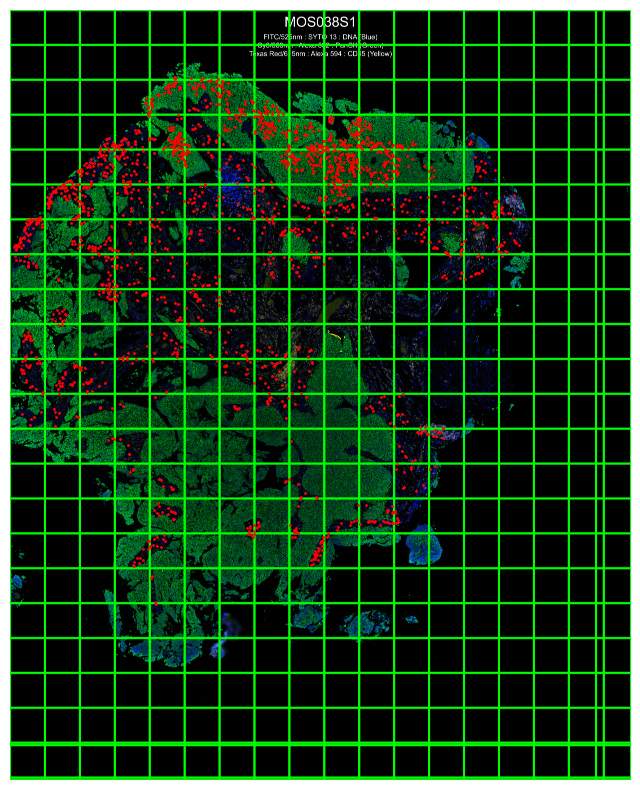

1919


In [10]:
import cv2
import matplotlib.pyplot as plt

def is_point_in_roi(point, roi):
    x, y = point
    roi_x1, roi_y1, roi_x2, roi_y2 = roi
    return roi_x1 <= x <= roi_x2 and roi_y1 <= y <= roi_y2

image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/original_image/{image_prefix}{folder}S1.png"
image = cv2.imread(image_path)
height, width, _ = image.shape

print("Image dimensions:", width, "x", height)


points_pixel = [(int(x * width), int(y * width)) for x, y in points_normalized]

print("Points_pixel:", len(points_pixel))


# Print some sample point coordinates for verification
print("Sample points (in pixel coordinates):", points_pixel[:3])

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw each ROI on the image
for roi in rois:
    x1, y1, x2, y2 = roi
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 40)

    # Print ROI coordinates for verification
    print("ROI:", roi)

# Set figure size
plt.figure(figsize=(10, 10))


total_points = 0


# Plot only the points that are inside any of the ROIs
for point in points_pixel:
    if any(is_point_in_roi(point, roi) for roi in rois):
        plt.scatter(point[0], point[1], c='red', marker='o', s=1)
        total_points += 1

# Display the image
plt.imshow(image_rgb)
plt.axis("off")
plt.show()
print(total_points)

Image dimensions: 11380 x 14125
Points_pixel: 1919
ROI: (0, 0, 640, 640)
ROI: (0, 640, 640, 1280)
ROI: (0, 1280, 640, 1920)
ROI: (0, 1920, 640, 2560)
ROI: (0, 2560, 640, 3200)
ROI: (0, 3200, 640, 3840)
ROI: (0, 3840, 640, 4480)
ROI: (0, 4480, 640, 5120)
ROI: (0, 5120, 640, 5760)
ROI: (0, 5760, 640, 6400)
ROI: (0, 6400, 640, 7040)
ROI: (0, 7040, 640, 7680)
ROI: (0, 7680, 640, 8320)
ROI: (0, 8320, 640, 8960)
ROI: (0, 8960, 640, 9600)
ROI: (0, 9600, 640, 10240)
ROI: (0, 10240, 640, 10880)
ROI: (0, 10880, 640, 11520)
ROI: (0, 11520, 640, 12160)
ROI: (0, 12160, 640, 12800)
ROI: (0, 12800, 640, 13440)
ROI: (0, 13440, 640, 14080)
ROI: (0, 13485, 640, 14125)
ROI: (640, 0, 1280, 640)
ROI: (640, 640, 1280, 1280)
ROI: (640, 1280, 1280, 1920)
ROI: (640, 1920, 1280, 2560)
ROI: (640, 2560, 1280, 3200)
ROI: (640, 3200, 1280, 3840)
ROI: (640, 3840, 1280, 4480)
ROI: (640, 4480, 1280, 5120)
ROI: (640, 5120, 1280, 5760)
ROI: (640, 5760, 1280, 6400)
ROI: (640, 6400, 1280, 7040)
ROI: (640, 7040, 1280, 7680

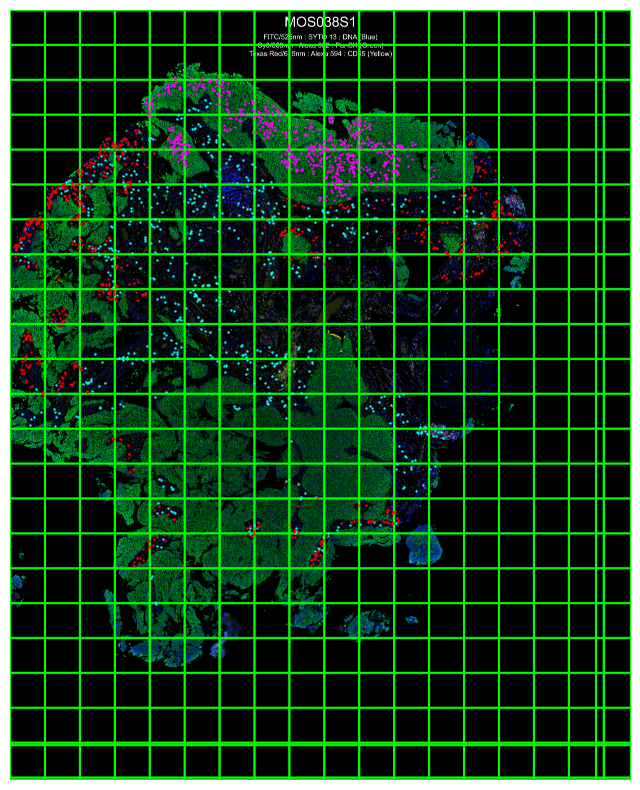

Total points in ROIs: 1919


In [11]:
import cv2
import matplotlib.pyplot as plt

def hex_to_bgr(hex_color):
    """Convert a hex color to a BGR tuple."""
    hex_color = hex_color.lstrip('#')
    hlen = len(hex_color)
    return tuple(int(hex_color[i:i+hlen//3], 16) for i in range(0, hlen, hlen//3))[::-1]

def is_point_in_roi(point, roi):
    x, y = point
    roi_x1, roi_y1, roi_x2, roi_y2 = roi
    return roi_x1 <= x <= roi_x2 and roi_y1 <= y <= roi_y2

image_path = f"/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/original_image/{image_prefix}{folder}S1.png"
image = cv2.imread(image_path)
height, width, _ = image.shape

print("Image dimensions:", width, "x", height)

points_pixel = [(int(x * width), int(y * width)) for x, y in points_normalized]

print("Points_pixel:", len(points_pixel))

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw each ROI on the image
for roi in rois:
    x1, y1, x2, y2 = roi
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 40)

    # Print ROI coordinates for verification
    print("ROI:", roi)

# Set figure size
plt.figure(figsize=(10, 10))


total_points = 0
# Plot only the points that are inside any of the ROIs
for point, color in zip(points_pixel, points_colors):
    if any(is_point_in_roi(point, roi) for roi in rois):
        plt.scatter(point[0], point[1], c=color, marker='o', s=0.5)
        total_points += 1

# Set figure size

# Display the image
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

print("Total points in ROIs:", total_points)


# All Points :

Total points inside ROIs: 1919
Total points: 1919


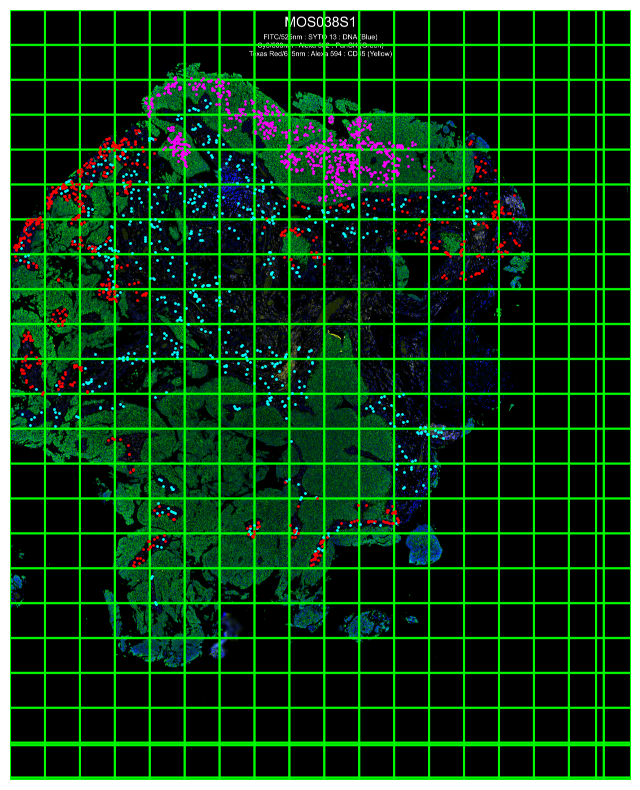

In [12]:
import cv2
import matplotlib.pyplot as plt

total_points = 0

# Draw each ROI on the image
for roi in rois:
    x1, y1, x2, y2 = roi
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 3)

# Set figure size
plt.figure(figsize=(10, 10))
    
# Plot and count the points that are inside any of the ROIs
for point, color in zip(points_pixel, points_colors):
    if any(is_point_in_roi(point, roi) for roi in rois):
        plt.scatter(point[0], point[1], c=color, marker='o', s=1)  # Points inside ROI
        total_points += 1
    else:
        plt.scatter(point[0], point[1], c='white', marker='o', s=1)  # Points outside ROI

print("Total points inside ROIs:", total_points)
print("Total points:", len(points_pixel))



# Display the image
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


# Save Cooardinate of points Locally and globally

# Normalized

# Three Class
CD45
panCK
OTHERS

In [13]:
# def get_label_from_color(color):
#     """Return the label based on the color."""
#     if color == '#00ffff' or color == '#0000ff':
#         return '0'
#     elif color == '#ff00ff':
#         return '1'
#     else:
#         return '2'

# # Dictionary to hold points for each ROI
# roi_points = {roi_index: [] for roi_index, _ in enumerate(rois)}

# # Assume points_colors is in the same order as points_pixel
# for point, color in zip(points_pixel, points_colors):
#     for roi_index, roi in enumerate(rois):
#         if is_point_in_roi(point, roi):
#             # Calculate local coordinates (relative to top-left of ROI)
#             local_x = point[0] - roi[0]  # roi[0] is roi_x1
#             local_y = point[1] - roi[1]  # roi[1] is roi_y1
#             label = get_label_from_color(color)
#             roi_points[roi_index].append((label, local_x, local_y))
#             break

# # Width and height are both 25
# w, h = 50, 50

# # Example image_number definition (you should replace this with your actual image number)
# image_number = folder
# normalized = 640
# # Write points to separate TXT files
# for roi_index, points in roi_points.items():
#     # Assuming each ROI is associated with specific patch coordinates (patch_x, patch_y)
#     # Replace with actual logic to obtain patch_x and patch_y for each ROI
#     patch_x, patch_y = 0, 0  # Example values, replace with actual patch coordinates

#     file_name = f"{image_number}_roi_{roi_index}.txt"
#     file_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/labels/{file_name}'
    
#     with open(file_path, 'w') as file:
#         for label, local_x, local_y in points:
#             file.write(f'{label} {local_x / normalized} {local_y / normalized} {w / normalized} {h / normalized}\n')

#     print(f'ROI {roi_index+1}: {len(points)} points written to {file_name}')



# Just Inside Boxes

In [14]:
def get_label_from_color(color):
    """Return the label based on the color."""
    if color == '#00ffff' or color == '#0000ff':
        return '0'
    elif color == '#ff00ff':
        return '1'
    else:
        return '2'

# Define the dimensions of your image
image_width, image_height = 640, 480  # Replace with actual image dimensions

# Dictionary to hold points for each ROI
roi_points = {roi_index: [] for roi_index, _ in enumerate(rois)}

# Assume points_colors is in the same order as points_pixel
for point, color in zip(points_pixel, points_colors):
    for roi_index, roi in enumerate(rois):
        if is_point_in_roi(point, roi):
            # Calculate local coordinates (relative to top-left of ROI)
            local_x = point[0] - roi[0]  # roi[0] is roi_x1
            local_y = point[1] - roi[1]  # roi[1] is roi_y1
            label = get_label_from_color(color)
            roi_points[roi_index].append((label, local_x, local_y))
            break

# Width and height for the boxes
w, h = 50, 50

# Example image_number definition (you should replace this with your actual image number)
image_number = folder
normalized = 640

# Write points to separate TXT files and count ignored annotations
for roi_index, points in roi_points.items():
    ignored_annotations = 0
    file_name = f"{image_number}_roi_{roi_index}.txt"
    file_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/labels/{file_name}'
    
    with open(file_path, 'w') as file:
        for label, local_x, local_y in points:
            # Check if the box goes outside the image boundaries
            if (local_x + w <= image_width) and (local_y + h <= image_height):
                file.write(f'{label} {local_x / normalized} {local_y / normalized} {w / normalized} {h / normalized}\n')
            else:
                ignored_annotations += 1

    print(f'ROI {roi_index+1}: {len(points) - ignored_annotations} points written to {file_name}')
    if ignored_annotations > 0:
        print(f'ROI {roi_index+1}: {ignored_annotations} annotations were ignored as they were outside the image boundaries')

# Optionally, you can also print the total number of ignored annotations after all ROIs are processed
#print(f'Total ignored annotations: {total_ignored_annotations}')


ROI 1: 0 points written to 38_roi_0.txt
ROI 2: 0 points written to 38_roi_1.txt
ROI 3: 0 points written to 38_roi_2.txt
ROI 4: 0 points written to 38_roi_3.txt
ROI 5: 0 points written to 38_roi_4.txt
ROI 6: 0 points written to 38_roi_5.txt
ROI 6: 4 annotations were ignored as they were outside the image boundaries
ROI 7: 35 points written to 38_roi_6.txt
ROI 7: 12 annotations were ignored as they were outside the image boundaries
ROI 8: 13 points written to 38_roi_7.txt
ROI 9: 0 points written to 38_roi_8.txt
ROI 10: 12 points written to 38_roi_9.txt
ROI 10: 4 annotations were ignored as they were outside the image boundaries
ROI 11: 16 points written to 38_roi_10.txt
ROI 11: 4 annotations were ignored as they were outside the image boundaries
ROI 12: 4 points written to 38_roi_11.txt
ROI 12: 2 annotations were ignored as they were outside the image boundaries
ROI 13: 0 points written to 38_roi_12.txt
ROI 14: 0 points written to 38_roi_13.txt
ROI 15: 0 points written to 38_roi_14.txt
R

# Four Class

In [15]:
# for i in range(len(categorized_data)):
#     if categorized_data[i]['Color'] == "#00ffff" or categorized_data[i]['Color'] == "#0000ff":
#         cd += 1
#     elif categorized_data[i]['Color'] == '#c0c0c0':
#         cd_less += 1
#     elif categorized_data[i]['Color'] == '#ff00ff':
#         panck += 1
#     else:
#         others += 1

In [16]:
# def get_label_from_color(color):
#     """Return the label based on the color."""
#     if color == 'c0c0c0':
#         return '0'
#     elif color == '#ff00ff':
#         return '1'
#     elif color == '#ff0000':
#         return '2'
#     else:
#         return None

# # Dictionary to hold points for each ROI
# roi_points = {roi_index: [] for roi_index, _ in enumerate(rois)}

# # Assume points_colors is in the same order as points_pixel
# for point, color in zip(points_pixel, points_colors):
#     for roi_index, roi in enumerate(rois):
#         if is_point_in_roi(point, roi):
#             # Calculate local coordinates (relative to top-left of ROI)
#             local_x = point[0] - roi[0]  # roi[0] is roi_x1
#             local_y = point[1] - roi[1]  # roi[1] is roi_y1
#             label = get_label_from_color(color)
#             if label:
#                 roi_points[roi_index].append((label, local_x, local_y))
#                 break

# # Width and height are both 25
# w, h = 50, 50

# # Example image_number definition (you should replace this with your actual image number)
# image_number = 23
# normalized = 640
# # Write points to separate TXT files
# for roi_index, points in roi_points.items():
#     # Assuming each ROI is associated with specific patch coordinates (patch_x, patch_y)
#     # Replace with actual logic to obtain patch_x and patch_y for each ROI
#     patch_x, patch_y = 0, 0  # Example values, replace with actual patch coordinates

#     file_name = f"{image_number}_roi_{roi_index}.txt"
#     file_path = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/{image_number}/ROIs_all/labels/{file_name}'
    
#     with open(file_path, 'w') as file:
#         for label, local_x, local_y in points:
#             file.write(f'{label} {local_x / normalized} {local_y / normalized} {w / normalized} {h / normalized}\n')

#     print(f'ROI {roi_index+1}: {len(points)} points written to {file_name}')



# Augmentation:

Flipped
Vertically Flipped
Rotation 180

In [1]:
label_folder = '/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/labels/'
image_folder = '/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/imges/'

In [2]:
import cv2
import os


# Create a list of image file names
image_files = [filename for filename in os.listdir(image_folder) if filename.endswith('.png')]

# Iterate through the image files
for image_file in image_files:
    print("1")
    # Load the image
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)

    # Load the corresponding label text file
    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(label_folder, label_file)

    # Read the label file
    with open(label_path, 'r') as file:
        lines = file.readlines()

    augmented_lines_h = []  # Horizontal flipping
    augmented_lines_v = []  # Vertical flipping
    augmented_lines_180 = []  # 180-degree rotation

    for line in lines:
        values = line.strip().split(' ')
        if len(values) == 5:
            label, x_center, y_center, width, height = map(float, values)

            # Apply horizontal flipping to the bounding box coordinates
            x_center_h = 1.0 - x_center

            # Apply vertical flipping to the bounding box coordinates
            y_center_v = 1.0 - y_center

            # Apply 180-degree rotation to the bounding box coordinates
            x_center_180 = 1.0 - x_center
            y_center_180 = 1.0 - y_center

            # Create a new line with the augmented coordinates for each transformation
            augmented_line_h = f'{label} {x_center_h} {y_center} {width} {height}\n'
            augmented_line_v = f'{label} {x_center} {y_center_v} {width} {height}\n'
            augmented_line_180 = f'{label} {x_center_180} {y_center_180} {width} {height}\n'

            augmented_lines_h.append(augmented_line_h)
            augmented_lines_v.append(augmented_line_v)
            augmented_lines_180.append(augmented_line_180)

    # Apply horizontal flipping to the image
    flipped_image = cv2.flip(image, 1)

    # Apply vertical flipping to the image
    vertically_flipped_image = cv2.flip(image, 0)

    # Apply 180-degree rotation to the image
    rotated_image = cv2.rotate(image, cv2.ROTATE_180)

    # Save the augmented images
    cv2.imwrite(os.path.join(image_folder, 'flipped_' + image_file), flipped_image)
    cv2.imwrite(os.path.join(image_folder, 'vertically_flipped_' + image_file), vertically_flipped_image)
    cv2.imwrite(os.path.join(image_folder, 'rotated_' + image_file), rotated_image)

    # Save the augmented label files
    with open(os.path.join(label_folder, 'flipped_' + label_file), 'w') as file:
        file.writelines(augmented_lines_h)

    with open(os.path.join(label_folder, 'vertically_flipped_' + label_file), 'w') as file:
        file.writelines(augmented_lines_v)

    with open(os.path.join(label_folder, 'rotated_' + label_file), 'w') as file:
        file.writelines(augmented_lines_180)


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


# Augmentation:

Blurred

In [70]:
import cv2
import os

# Directories for the images and labels
# Loop through all files in the image directory
for filename in os.listdir(image_folder):
    # Check if the file is an image
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Read the image
        image_path = os.path.join(image_folder, filename)
        image = cv2.imread(image_path)

        # Apply Gaussian Blur
        blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

        # Save the blurred image in the same directory with a 'blur_' prefix
        blurred_filename = 'blur_' + filename
        blurred_image_path = os.path.join(image_folder, blurred_filename)
        cv2.imwrite(blurred_image_path, blurred_image)

        # Check for the corresponding label file
        label_filename = os.path.splitext(filename)[0] + '.txt'
        label_path = os.path.join(label_folder, label_filename)
        if os.path.exists(label_path):
            # Save the label file with a 'blur_' prefix in the same label directory
            blurred_label_filename = 'blur_' + label_filename
            blurred_label_path = os.path.join(label_folder, blurred_label_filename)
            with open(label_path, 'r') as original_label_file, open(blurred_label_path, 'w') as blurred_label_file:
                for line in original_label_file:
                    blurred_label_file.write(line)

print("Processing complete.")


Processing complete.


# Zoom In

In [97]:
folder = "79"

In [98]:
import cv2
import os

def zoom_image(image, zoom_factor=1.2):
    height, width = image.shape[:2]
    new_width, new_height = int(width / zoom_factor), int(height / zoom_factor)
    start_x = int((width - new_width) / 2)
    start_y = int((height - new_height) / 2)
    cropped_image = image[start_y:start_y + new_height, start_x:start_x + new_width]
    resized_image = cv2.resize(cropped_image, (width, height))
    return resized_image, (start_x, start_y, new_width, new_height)

def adjust_annotation(annotation, crop_area, zoom_factor, image_width, image_height):
    label, x_center_norm, y_center_norm, w_norm, h_norm = map(float, annotation.split())
    x_center, y_center, w, h = x_center_norm * image_width, y_center_norm * image_height, w_norm * image_width, h_norm * image_height

    start_x, start_y, new_width, new_height = crop_area
    scale_x, scale_y = image_width / new_width, image_height / new_height

    # Adjust the coordinates and scale them
    new_x_center = (x_center - start_x) * scale_x
    new_y_center = (y_center - start_y) * scale_y
    new_w = w * scale_x
    new_h = h * scale_y

    # Check if the annotation is within the boundaries of the zoomed image
    if (new_x_center - new_w/2 >= 0 and new_x_center + new_w/2 <= image_width and
        new_y_center - new_h/2 >= 0 and new_y_center + new_h/2 <= image_height):
        new_x_center_norm = new_x_center / image_width
        new_y_center_norm = new_y_center / image_height
        new_w_norm = new_w / image_width
        new_h_norm = new_h / image_height
        return f'{label} {new_x_center_norm} {new_y_center_norm} {new_w_norm} {new_h_norm}'

    return None

# Directories
image_dir = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/images'
label_dir = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/labels'
output_image_dir = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/images'
output_label_dir = f'/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/full_PA/{folder}/labels'

os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)

zoom_factor = 1.2

# Process each image and its annotations
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)

        zoomed_image, crop_area = zoom_image(image, zoom_factor=zoom_factor)
        zoomed_image_path = os.path.join(output_image_dir, 'zoomed_' + filename)
        cv2.imwrite(zoomed_image_path, zoomed_image)

        label_filename = os.path.splitext(filename)[0] + '.txt'
        label_path = os.path.join(label_dir, label_filename)
        adjusted_label_path = os.path.join(output_label_dir, 'zoomed_' + label_filename)

        if os.path.exists(label_path):
            with open(label_path, 'r') as label_file, open(adjusted_label_path, 'w') as adjusted_label_file:
                annotations = label_file.readlines()
                adjusted_annotations = [adjust_annotation(ann, crop_area, zoom_factor, image.shape[1], image.shape[0]) for ann in annotations]
                adjusted_annotations = [ann for ann in adjusted_annotations if ann is not None]
                adjusted_label_file.write('\n'.join(adjusted_annotations))

print("Processing complete.")


Processing complete.


# Validation For Fully Annotated patches

In [1]:
import os

# Function to convert class names to integers
def class_name_to_int(class_name):
    lower_class_name = class_name.lower()
    if lower_class_name == 'cd45':
        return 0
    elif lower_class_name == 'panck' or lower_class_name == 'pan ck' :
        return 1
    elif lower_class_name == 'others' or lower_class_name == 'other':
        return 2
    else:
        raise ValueError("Unknown class name: " + class_name)

# Function to normalize coordinates and dimensions
def normalize(value, max_value):
    return value / max_value

# Input and output directories
input_dir = '/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/Maria/PSCC/annotaions/'
output_dir = '/Users/yshokrollahi/Desktop/MD/Project3/dataset/IF/ROIs/Validation_By_Pathologist/Maria/PSCC/annotaions_yolov8/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List all the TSV files in the input directory
tsv_files = [f for f in os.listdir(input_dir) if f.endswith('.tsv')]

for tsv_file in tsv_files:
    with open(os.path.join(input_dir, tsv_file), 'r') as file:
        lines = file.readlines()

    # Create a new file in the output directory
    output_file = os.path.join(output_dir, tsv_file.replace('.tsv', '_yolov8.txt'))
    with open(output_file, 'w') as file:
        for line in lines[1:]:  # Skip the header line
            data = line.strip().split('\t')
            x = float(data[0]) / 640
            y = float(data[1]) / 640
            class_name = class_name_to_int(data[2])
            width = 50 / 640
            height = 50 / 640
            file.write(f"{class_name} {x} {y} {width} {height}\n")

print("Conversion to YOLOv8 format completed.")



Conversion to YOLOv8 format completed.
